# SCAVENGE Data Challenge

SCAVENGE Data Challenge (http://www.scavenge.eu/dissemination/data-challenge/)

This Jupyter Notebook loads the csv files for one eNodeB into pandas Dataframes. 
The dataset is obtained using a sniffer that collect the data over the LTE PDCCH. This PHY channel is responsible for the communication of the scheduling information. The data is sent by the eNodeB to the user terminal. Each user is temporally identified by a RNTI (Radio Network Temporary Identifier) which is renewed after a short time of inactivity (about 10 seconds).

Data can be missing or it can contain mistakes due to measurements failures. 

•	Each folder corresponds to a different eNodeB

•	The measurements are 1 week long for each eNodeB

•	Each file contains approximately 4 hours of measurements

•	Each line corresponds to 1 millisecond (the duration of one LTE radio frame is 10 ms. One frame is divided into 10 subframes of 1 ms each)

	Each file has the following 6 columns:

• ['dates','subframe_n','subframe_ind','rnti','direction','mcs']

•	dates:  timestamp of the measurements (format %Y%m%d%H%M%S)

•	subframe_n: LTE subframe number

•	subframe_ind: LTE frame in [0,9]

•	rnti: Radio Network Temporary Identifier in [0,65535]. Note that RNTI in [0,10] should be discarded and 65535 is reserved for broadcasting/paging

•	direction: 1 for downlink – 0 for uplink

•	mcs: MCS index


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os, time, pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

## Getting file list for one eNodeB

Do the same for each eNodeB (e.g. folder)

In [2]:
folder = 'new_B/'
file_list = sorted([os.path.join(folder,f) for f in os.listdir(folder)])

## Load csv files in pandas Dataframe (it takes a while...)

If all the files does not fit in memory, then loaded manually in separate chunks (e.g. process only part of the files in file_list)

In [3]:
columns = ['dates','subframe_n','subframe_ind','rnti','direction','mcs']
df = pd.concat(pd.read_csv(f,header = None,names = columns,index_col =0) for f in sorted(file_list) if 'file_' in f)
df.index = pd.to_datetime(df.index,format = '%Y%m%d%H%M%S')

## Plot averaged per 60 minutes

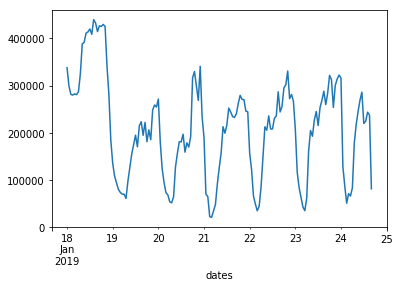

In [4]:
df.resample('60T').sum().direction.plot()

## Plot daily traffic pattern

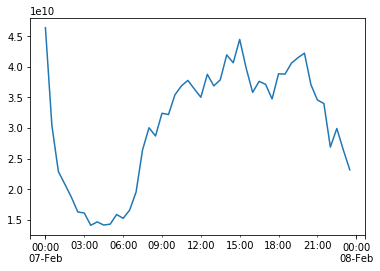

In [5]:
df1 = df.groupby([df.index.hour,df.index.minute]).sum()
df1.index = pd.date_range(start='00:00:00', end='23:59:59',freq='T')
df1.resample('30T').sum().rnti.plot()